In [2]:
import numpy as np
import copy
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio
from promp import ProMP
from copromp import CoProMP
from utils.utils import linear_phase
from utils.utils import normalized_gaussian_basis

# Test linear phase

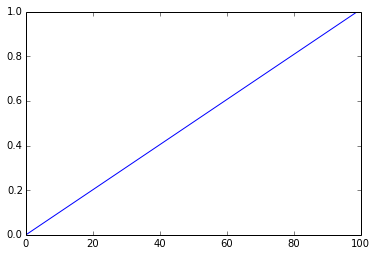

In [2]:
dt = 0.01
Z = linear_phase(dt)

plt.plot(Z)

# Test normalized gaussian basis

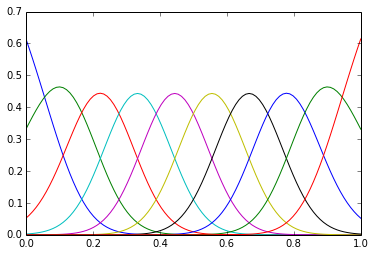

In [3]:
dt = 0.01
N = 10
Z = linear_phase(dt)

basis = normalized_gaussian_basis(N, Z, dt)

for i in range(10):
    plt.plot(np.linspace(0, 1, 1 / dt), basis[i, :])

# Test ProMPs

## Test 1dof

promp.py:63: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  basis_t = self._basis[:, t_index][:, np.newaxis]


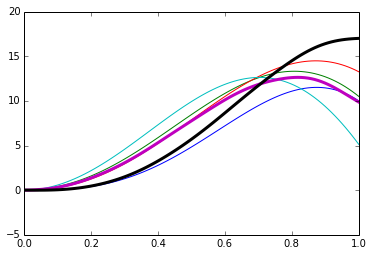

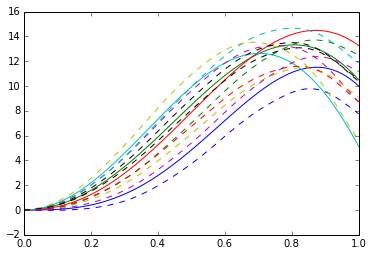

prob:  [  1.58026801e+11   2.73417353e+10   1.82196710e+12   3.59792992e+11
   7.84061768e+09   6.20900108e+11   5.50734572e+09   1.34348919e+12
   1.72410105e+11   3.00946382e+09]
[ 0.00663043  0.00114719  0.07644537  0.01509605  0.00032897  0.02605148
  0.00023108  0.05636958  0.00723391  0.00012627]
prob:  2.38335840027e+13
1.0


In [4]:
X = np.linspace(0, 1, 100)[:, np.newaxis]
y1 = X ** 2 * np.sin(X * np.pi / 1.2) * 20
y2 = X ** 1.2 * np.sin((X + 0.03) * np.pi / 1.25) * 20
y3 = X ** 1.25 * np.sin(X * np.pi / 1.3) * 20
y4 = X * np.sin(X * np.pi / 1.09) * 20


Y = np.hstack((y1, y2, y3, y4))
pmp = ProMP(Y, 1, dt=0.01)
pmp.build(linear_phase, lambda z, dt: normalized_gaussian_basis(10, z, dt))


plt.plot(X, y1)
plt.plot(X, y2)
plt.plot(X, y3)
plt.plot(X, y4)
Ymp = pmp.most_probable()
plt.plot(X, Ymp[:, 1], c='m', linewidth=3)


pmp2 = pmp.condition_non_destructive(np.array([[17]]))
Ymp2 = pmp2.most_probable()
plt.plot(X, Ymp2[:, 1], c='k', linewidth=3)
plt.show()


plt.plot(X, y1)
plt.plot(X, y2)
plt.plot(X, y3)
plt.plot(X, y4)
Yr = pmp.random(10)
for i in range(1, 10 + 1):
    plt.plot(X, Yr[:, i], '--')
plt.show()


#print Yr[:, 1:]
print pmp.probability(Yr[:, 1:], True)
print pmp.probability(Ymp[:, 1][:, np.newaxis], True)

## Test 2 dof

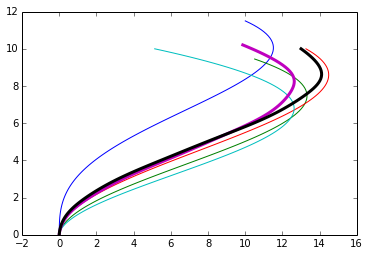

(100, 21)


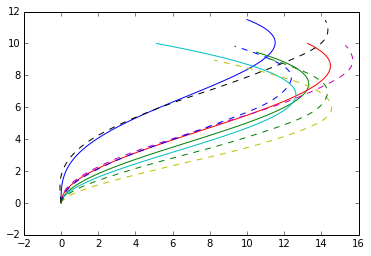

prob:  [  1.01367486e+29   2.89280311e+29   1.43433931e+29   2.36938121e+29
   2.25746127e+27   1.74818405e+31   2.02940468e+28   1.17772243e+30
   5.40632037e+28   4.64096854e+30]
[  3.26705742e-05   9.32345691e-05   4.62285204e-05   7.63647670e-05
   7.27576057e-07   5.63436845e-03   6.54073794e-06   3.79578004e-04
   1.74244817e-05   1.49577654e-03]
prob:  3.10271516538e+33
1.0


In [5]:
X = np.linspace(0, 1, 100)[:, np.newaxis]
y1_x = X ** 2 * np.sin(X * np.pi / 1.2) * 20
y1_y = 1.15 * X * 10
y2_x = X ** 1.2 * np.sin((X + 0.03) * np.pi / 1.25) * 20
y2_y = (0.95 * X) ** 1.1 * 10
y3_x = X ** 1.25 * np.sin(X * np.pi / 1.3) * 20
y3_y = X ** 1.1 * 10
y4_x = X * np.sin(X * np.pi / 1.09) * 20
y4_y = X ** 1.1 * 10


Y = np.hstack((y1_x, y1_y, y2_x, y2_y, y3_x, y3_y, y4_x, y4_y))
pmp = ProMP(Y, 2, dt=0.01)
pmp.build(linear_phase, lambda z, dt: normalized_gaussian_basis(10, z, dt))

plt.plot(y1_x, y1_y)
plt.plot(y2_x, y2_y)
plt.plot(y3_x, y3_y)
plt.plot(y4_x, y4_y)
Ymp = pmp.most_probable()
plt.plot(Ymp[:, 1], Ymp[:, 2], c='m', linewidth=3)


pmp2 = pmp.condition_non_destructive(np.array([[13, 10]]).T)
Ymp2 = pmp2.most_probable()
plt.plot(Ymp2[:, 1], Ymp2[:, 2], c='k', linewidth=3)
plt.show()


plt.plot(y1_x, y1_y)
plt.plot(y2_x, y2_y)
plt.plot(y3_x, y3_y)
plt.plot(y4_x, y4_y)
Yr = pmp.random(10)
print Yr.shape
for i in range(1, 10 + 1, 2):
    plt.plot(Yr[:, i], Yr[:, i + 1], '--')
plt.show()


print pmp.probability(Yr[:, 1:], True)
print pmp.probability(Ymp[:, 1:], True)

## Test Baxter trajectories

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


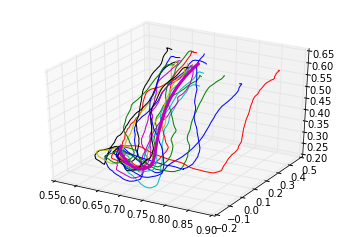

In [5]:
N = 23
Y = None
for i in range(1, N + 1):
    traj = sio.loadmat('/home/rui/Documents/ros_ws/src/symab_backpack/data/trajectories/traj%d.mat' % i)['traj']
    traj = traj[:, range(8, 10+1) + range(22, 24+1)]
    Y = np.hstack((Y, traj)) if Y is not None else traj
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, 23 * 6, 6):
    #print i
    ax.plot(xs=Y[:, i], ys=Y[:, i+1], zs=Y[:,i+2])
    #print Y[0, [i, i+1, i+2]]

pmp = ProMP(Y, 6)
pmp.build(linear_phase, lambda z, dt: normalized_gaussian_basis(10, z, dt))
Ymp = pmp.most_probable()
ax.plot(Ymp[:, 1], Ymp[:, 2], Ymp[:, 3], c='m', linewidth=3)

# Test target metric (for simulated reward computation)

In [144]:
N = 23
Y = None

# load targets
for i in range(1, N + 1):
    target = sio.loadmat('/home/rui/Documents/ros_ws/src/symab_backpack/data/trajectories/traj%d.mat' % i)['target'][:18, :].T
    Y = np.vstack((Y, target)) if Y is not None else target

We started by testing an approach based on the formula:
$d(y) = \frac{1}{\sqrt{(2 \pi)^k \vert \Sigma \vert}} \exp{ \left( -\frac{1}{2} (y - \bar{x})^T \Sigma^{-1} (y - \bar{x}) \right) }$.

We concluded this leads to huge numbers.
Note the small matrix norm and very high result.

Mu:      [[ 2.59827956 -0.12543053  0.84790567  2.61198556 -0.13225496  0.6135723
   2.61794893 -0.13896557  0.38716259  2.64887065  0.04356239  0.60921905
   2.70307497  0.13040508  0.32217896  2.65536833  0.40480607  0.1823783 ]]
Sample:  [ 2.58389205 -0.05333212  0.86699612  2.5970597  -0.0613422   0.63752617
  2.60284648 -0.06699211  0.41098421  2.6316054   0.12091659  0.63386314
  2.68031145  0.20251671  0.3164394   2.69141588  0.46965753  0.10132855]
Res:     [[ 0.00013968]]
norm(Sigma):  0.0336035225092
eigenvalues:  [  3.11875414e-02   1.17675308e-02   2.94550195e-03   2.45612904e-03
   1.69470260e-03   5.30839818e-04   4.07552324e-04   1.30985140e-04
   6.97894052e-05   6.60710129e-05   5.43631623e-05   3.36808836e-05
   1.33736756e-05   8.51980985e-06   3.49139917e-06   1.35058121e-06
   7.25760992e-08   4.13610988e-08]


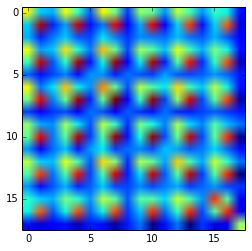

In [145]:
mu = np.mean(Y, axis=0, keepdims=True)
sigma = np.cov(Y, rowvar=False)
sample = Y[1, :]
res = np.exp(-0.5 * (sample - mu).dot(np.linalg.pinv(sigma).dot((sample - mu).T)))# / np.sqrt(np.linalg.det(sigma) * (2 * np.pi) ** 18)
eigval, eigvec = np.linalg.eig(sigma)

print 'Mu:     ', mu
print 'Sample: ', sample
print 'Res:    ', res
print 'norm(Sigma): ', np.linalg.norm(sigma)
print 'eigenvalues: ', eigval

plt.imshow(sigma)

We decided to reduce the dimensional space using PCA.
We started by doing SVD to decide how many components to keep.

From the elbow plot, we decided to keep 4 components.

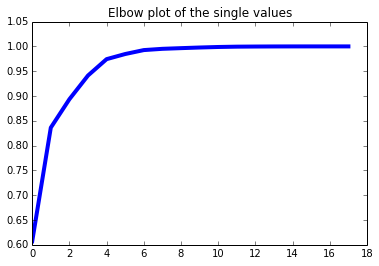

Mu:      [[  1.71360510e-16  -2.11183728e-16   1.92780574e-16   3.72286742e-16]]
Sample:  [ 0.21652766 -0.09753887  0.03515514  0.00929303]
Res:     [[ 0.25075898]]
norm(Sigma_t):  0.0335536297598
eigenvalues:  [ 0.03118754  0.01176753  0.00245613  0.0029455 ]


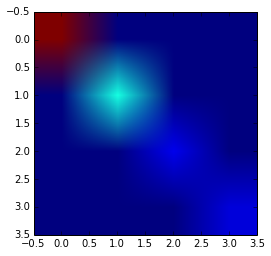

In [157]:
import sklearn.decomposition

u,s,v = np.linalg.svd(sigma)
plt.plot(np.cumsum(s) / np.sum(s), linewidth=4)
plt.title('Elbow plot of the single values')
plt.show()

pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(Y)
Y_t = pca.transform(Y)

mu_t = np.mean(Y_t, axis=0, keepdims=True)
sigma_t = np.cov(Y_t, rowvar=False)
sample_t = Y_t[14, :]
res_t = np.exp(-0.5 * (sample_t - mu_t).dot(np.linalg.pinv(sigma_t).dot((sample_t - mu_t).T)))#  / np.sqrt(np.linalg.det(sigma_t) * (2 * np.pi) ** 2)
eigval_t, eigvec_t = np.linalg.eig(sigma_t)

print 'Mu:     ', mu_t
print 'Sample: ', sample_t
print 'Res:    ', res_t
print 'norm(Sigma_t): ', np.linalg.norm(sigma_t)
print 'eigenvalues: ', eigval_t

plt.imshow(sigma_t)

In [133]:
Y_t.shape

(23, 2)

In [134]:
np.mean(Y, axis=0, keepdims=True).shape

(1, 18)

In [149]:
np.c_?

# CoProMP

## Test 2 dof

In [9]:
X = np.linspace(0, 1, 100)[:, np.newaxis]
y1_x = X ** 2 * np.sin(X * np.pi / 1.2) * 20
y1_y = 1.15 * X * 10
y2_x = X ** 1.2 * np.sin((X + 0.03) * np.pi / 1.25) * 20
y2_y = (0.95 * X) ** 1.1 * 10
y3_x = X ** 1.25 * np.sin(X * np.pi / 1.3) * 20
y3_y = X ** 1.1 * 10
y4_x = X * np.sin(X * np.pi / 1.09) * 20
y4_y = X ** 1.1 * 10
Y = np.hstack((y1_x, y1_y, y2_x, y2_y, y3_x, y3_y, y4_x, y4_y))

#o_1 = np.repeat(Y[-1, [0, 1]][np.newaxis, :], 2, axis=0)
#o_2 = np.repeat(Y[-1, [2, 3]][np.newaxis, :], 2, axis=0)
#o_3 = np.repeat(Y[-1, [4, 5]][np.newaxis, :], 2, axis=0)
#o_4 = np.repeat(Y[-1, [6, 7]][np.newaxis, :], 2, axis=0)
o_1 = Y[-1, [0, 1]][np.newaxis, :]
o_2 = Y[-1, [2, 3]][np.newaxis, :]
o_3 = Y[-1, [4, 5]][np.newaxis, :]
o_4 = Y[-1, [6, 7]][np.newaxis, :]

O = np.hstack((o_1, o_2, o_3, o_4))

copmp = CoProMP(O, Y, 2, 2, 1)
copmp.build(linear_phase, lambda z, dt: normalized_gaussian_basis(2, z, dt),
            linear_phase, lambda z, dt: normalized_gaussian_basis(10, z, dt))


new_o = o_4.T + 1
copmp.condition(new_o, 1)

Ymp = copmp.most_probable()

plt.plot(y1_x, y1_y)
plt.plot(y2_x, y2_y)
plt.plot(y3_x, y3_y)
plt.plot(y4_x, y4_y)
plt.plot(Ymp[:, 1], Ymp[:, 2], c='k', linewidth=3)
plt.show()

LinAlgError: Incompatible dimensions

In [4]:
O

array([[ 10.        ,  11.5       ,  10.5034926 ,   9.45139613,
         13.26245316,  10.        ,   5.12996624,  10.        ]])

In [215]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
